In [1]:
%matplotlib inline

from Utils import *

create_dir('output')

The directory output  already exists


In [5]:
seed = 123
np.random.seed(seed)

runs = 20
data = pd.DataFrame()

for i in range(runs):
    x1 = uniform(-10,10,2)
    x2 = uniform(-10,10,2)
    x_test = uniform(-10,10,2)

    row = pd.Series(np.concatenate((x1, x2, x_test)))
    data = data.append(row, ignore_index=True)

data.columns = ['x11', 'x12', 'x21', 'x22', 'x1_test', 'x2_test']
# data.to_csv('output/data.csv', index=False)
# data = data.loc[10:20,:]
data.head()

,x11,x12,x21,x22,x1_test,x2_test
0,3.929384,-4.277213,-5.462971,1.026295,4.389379,-1.537871
1,9.615284,3.696595,-0.381362,-2.157650,-3.136440,4.580994
2,-1.228555,-8.806442,-2.039115,4.759908,-6.350165,-6.490965
3,0.631027,0.636552,2.688019,6.988636,4.489106,2.220470
4,4.448868,-3.540822,-2.764227,-5.434735,-4.125719,2.619522


In [18]:
data_out = pd.DataFrame()
for index, rows in data.iterrows(): 

    # Extract data
    x1 =np.array([rows.x11, rows.x12])
    x2 =np.array([rows.x21, rows.x21])
    x_test = np.array([rows.x1_test, rows.x2_test])
    
    # Compute the average classically of classical swap test
    cAVG = classic_ensemble(x1, x2, x_test)
    
    # Swap test using x1 as training on simulator
    qc_x1 = quantum_swap_test(x1, x_test)
    m1 = exec_simulator(qc_x1)
    r1 = retrieve_proba(m1)
    
    # Swap test using x2 as training on simulator
    qc_x2 = quantum_swap_test(x2, x_test)
    m2 = exec_simulator(qc_x2)
    r2 = retrieve_proba(m2)
    
    # Compute the average classically
    r_avg = np.mean([r1[0],r2[0]])
    
    # Compute the average using quantum ensemble algorithm on simulator
    qc = quantum_ensemble(x1, x2, x_test)
    r = exec_simulator(qc)
    r_ens = retrieve_proba(r)

    row = [cAVG, r1[0], r2[0], r_avg, r_ens[0]]

    row = pd.Series(row)
    
    data_out = data_out.append(row, ignore_index=True)

data_out.columns = ['cAVG', 'qx1_sim', 'qx2_sim', 'qAVG_sim', 'qEns_sim']
data_out.to_csv('output/data_out_simulator.csv', index=False)
data_out.head()

,cAVG,qx1_sim,qx2_sim,qAVG_sim,qEns_sim
0,0.741456,0.893066,0.601318,0.747192,0.743774
1,0.521828,0.528564,0.516968,0.522766,0.513672
2,0.911809,0.827148,1.000000,0.913574,0.914917
3,0.948037,0.944702,0.953003,0.948853,0.949341
4,0.759047,0.994507,0.509521,0.752014,0.757080


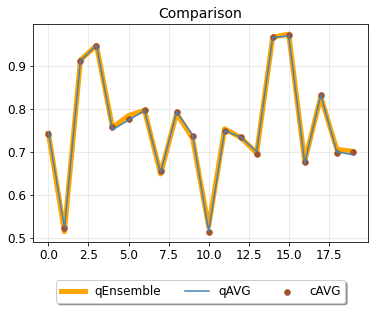

In [19]:
avg = data_out.qAVG_sim
ens = data_out.qEns_sim
clas = data_out.cAVG

plot_multiple_experiments(runs, avg, ens, clas, filename='Simulator')

In [15]:
ttest_ind(ens, clas)

Ttest_indResult(statistic=-0.03992050464907665, pvalue=0.9683655098045181)

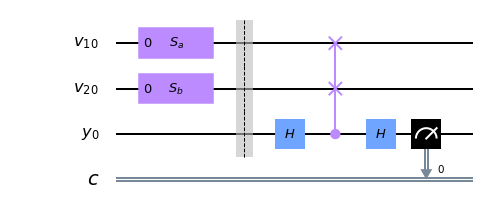

In [20]:
qc = quantum_swap_test(x1, x2)
qc.draw(output='mpl')

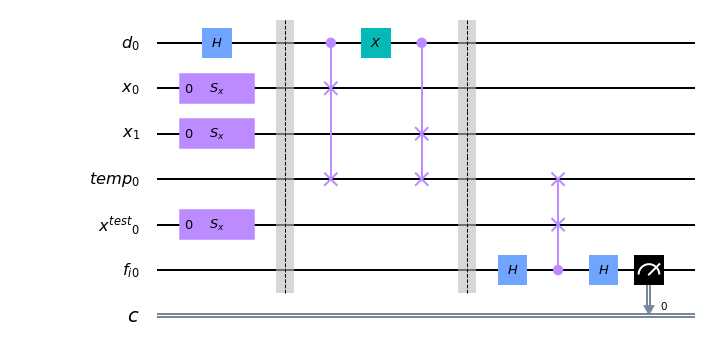

In [21]:
qc = quantum_ensemble(x1, x2, x_test)
qc.draw(output='mpl')

In [ ]:
# fig, (ax, ax1) = plt.subplots(1, 2, figsize=(10,3))

# p0_avg = data_out.qAVG_sim
# p0_ens = data_out.qEns_sim
# p0_clas = data_out.cAVG

# #ax = plt.subplot(221)

# ax.plot(x, p0_ens, color='orange', label='qEnsemble', zorder=1, linewidth=5)
# ax.plot(x, p0_avg, color='steelblue', label='qAVG')
# ax.scatter(x, p0_clas, label='cAVG', color='sienna', zorder=2, linewidth=.5)

# #ax.set_xlim(-1.1, 1.1)
# # ax.set_ylim(-.2, 1.05)
# ax.grid(alpha=0.3)
# #ax.set_xticks(np.round(np.arange(-1, 1.1, .4), 1).tolist())
# #ax.set_title('Comparison', size=14)
# ax.tick_params(labelsize=12)


# avg = data_out.qAVG_real
# ens = data_out.qEns_real
# clas = data_out.cAVG

# #ax1 = plt.subplot(222)

# ax1.plot(x, ens, color='orange', label='qEnsemble', zorder=1, linewidth=5)
# ax1.plot(x, avg, color='steelblue', label='qAVG')
# ax1.scatter(x, clas, label='cAVG', color='sienna', zorder=2, linewidth=.5)

# #ax.set_xlim(-1.1, 1.1)
# # ax.set_ylim(-.2, 1.05)
# ax1.grid(alpha=0.3)
# #ax.set_xticks(np.round(np.arange(-1, 1.1, .4), 1).tolist())
# #ax.set_title('Comparison', size=14)
# ax1.tick_params(labelsize=12)
# # plt.legend(loc='lower center',# bbox_to_anchor=(0.5, -.15),
# #           ncol=3, fancybox=True, shadow=True, fontsize = 12)
# handles, labels = ax.get_legend_handles_labels()
# lgd=fig.legend(handles, labels, loc='lower center', ncol=3, bbox_to_anchor=(0.4, -.025))

# plt.savefig('output/experiments.png', dpi = 300, bbox_extra_artists=(lgd,), bbox_inches='tight')
# plt.show()
# plt.close()

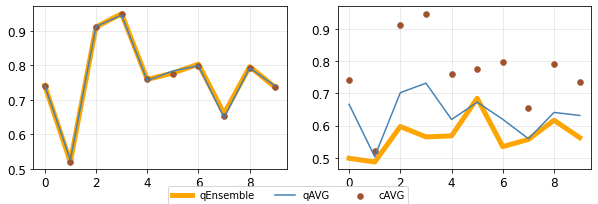

In [76]:
# fig, (ax, ax1) = plt.subplots(1, 2, figsize=(10,3))

# p0_avg = data_out.qAVG_sim
# p0_ens = data_out.qEns_sim
# p0_clas = data_out.cAVG

# #ax = plt.subplot(221)

# ax.plot(x, p0_ens, color='orange', label='qEnsemble', zorder=1, linewidth=5)
# ax.plot(x, p0_avg, color='steelblue', label='qAVG')
# ax.scatter(x, p0_clas, label='cAVG', color='sienna', zorder=2, linewidth=.5)

# #ax.set_xlim(-1.1, 1.1)
# # ax.set_ylim(-.2, 1.05)
# ax.grid(alpha=0.3)
# #ax.set_xticks(np.round(np.arange(-1, 1.1, .4), 1).tolist())
# #ax.set_title('Comparison', size=14)
# ax.tick_params(labelsize=12)


# avg = data_out.qAVG_real
# ens = data_out.qEns_real
# clas = data_out.cAVG

# #ax1 = plt.subplot(222)

# ax1.plot(x, ens, color='orange', label='qEnsemble', zorder=1, linewidth=5)
# ax1.plot(x, avg, color='steelblue', label='qAVG')
# ax1.scatter(x, clas, label='cAVG', color='sienna', zorder=2, linewidth=.5)

# #ax.set_xlim(-1.1, 1.1)
# # ax.set_ylim(-.2, 1.05)
# ax1.grid(alpha=0.3)
# #ax.set_xticks(np.round(np.arange(-1, 1.1, .4), 1).tolist())
# #ax.set_title('Comparison', size=14)
# ax1.tick_params(labelsize=12)
# # plt.legend(loc='lower center',# bbox_to_anchor=(0.5, -.15),
# #           ncol=3, fancybox=True, shadow=True, fontsize = 12)
# handles, labels = ax.get_legend_handles_labels()
# lgd=fig.legend(handles, labels, loc='lower center', ncol=3, bbox_to_anchor=(0.4, -.025))

# plt.savefig('output/experiments.png', dpi = 300, bbox_extra_artists=(lgd,), bbox_inches='tight')
# plt.show()
# plt.close()